In [4]:
import numpy as np
import pandas as pd
from scipy import stats

In [5]:
childcare = pd.read_csv("childcare_costs.csv")
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [6]:
health = pd.read_csv("healthdata.csv")
health.head()

,name,fips,state,land_area (km^2),area (km^2),longitude (deg),latitude (deg),noaa/prcp,noaa/snow,noaa/temp,...,"industry/Agriculture, forestry, fishing and hunting/payroll","industry/Agriculture, forestry, fishing and hunting/employees",industry/Utilities/payroll,industry/Utilities/employees,industry/Management of companies and enterprises/payroll,industry/Management of companies and enterprises/employees,industry/Industries not classified/payroll,industry/Industries not classified/employees,"industry/Mining, quarrying, and oil and gas extraction/payroll","industry/Mining, quarrying, and oil and gas extraction/employees"
0,cuming county,31039,NE,1477.641638,1488.343176,-96.787366,41.916346,30.5,28.2,48.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lancaster county,31109,NE,2169.252486,2192.120047,-96.688211,40.784132,31.0,25.3,51.0,...,730000.0,111.0,8730000.0,95.0,165117000.0,2024.0,150000.0,3.0,NaN,NaN
2,nuckolls county,31129,NE,1489.645186,1491.363670,-98.047277,40.176383,27.7,22.2,51.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,keith county,31101,NE,2749.531887,2874.204062,-101.657059,41.198294,20.0,25.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,phelps county,31137,NE,1398.048570,1399.695104,-99.414593,40.513105,25.5,26.7,50.3,...,2557000.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
counties = pd.read_csv("counties.csv")
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [8]:
counties['county_name'] = counties['county_name'].str.lower()
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,autauga county,Alabama,AL
1,1003,baldwin county,Alabama,AL
2,1005,barbour county,Alabama,AL
3,1007,bibb county,Alabama,AL
4,1009,blount county,Alabama,AL


In [12]:
childcare_health = childcare.merge(health, left_on='county_fips_code', right_on='fips', how='inner')
print("num rows: ", childcare_health.shape[0])
print("num columns: ", childcare_health.shape[1])
data_all = childcare_health
childcare_health.head()
childcare_health.to_csv('/Users/claudiarodriguez/Downloads/216proj/final.csv')

num rows:  34549
num columns:  298


Coefficients:  [-3.0194502]


Text(0.5, 1.0, 'Less than High School and Infant Childcare Costs')

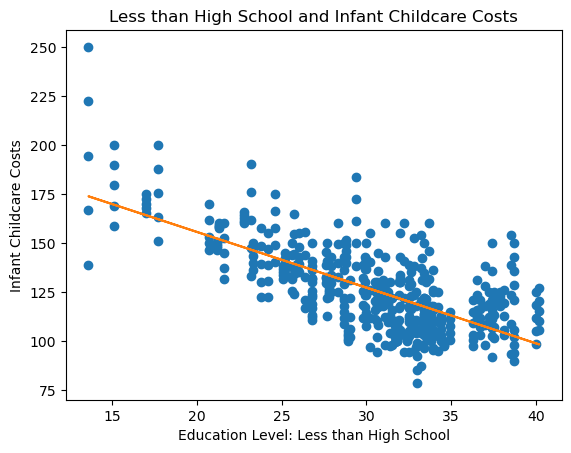

In [61]:
# education, rural, suburban, etc. on healthcare costs (for each age??)
# probably group by education or something tbh then test that
# the columns are edu/less-than-high-school, edu/high-school, edu/some-college, edu/bachelors+, maybe just get unique values bc a lot of vertical lines
# other ones are mfcc_infant, mfcc_toddler, mfcc_preschool
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cleaned = childcare_health.dropna(subset=['edu/less-than-high-school', 'mfcc_infant'])
cleaned = cleaned[cleaned['state']=='NC']
data = cleaned['edu/less-than-high-school'].values.reshape(-1, 1)
target = cleaned['mfcc_infant'].values

# Creating linear regression
regression = LinearRegression()
regression.fit(data, target)

# Coefficients and R-squared
print("Coefficients: ", regression.coef_)

# Plotting
x = cleaned['edu/high-school'].values
y = cleaned['mfcc_infant'].values

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel('Education Level: Less than High School')
plt.ylabel('Infant Childcare Costs')
plt.title('Less than High School and Infant Childcare Costs')

Coefficients:  [-2.84086082]


Text(0.5, 1.0, 'High School and Infant Childcare Costs')

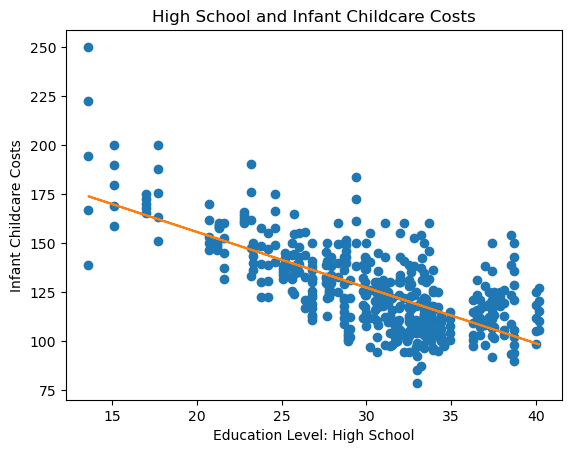

In [62]:
# Shaping data
cleaned = childcare_health.dropna(subset=['edu/high-school', 'mfcc_infant'])
cleaned = cleaned[cleaned['state']=='NC']
data = cleaned['edu/high-school'].values.reshape(-1, 1)
target = cleaned['mfcc_infant'].values

# Creating linear regression
regression = LinearRegression()
regression.fit(data, target)

# Coefficients and R-squared
print("Coefficients: ", regression.coef_)

# Plot
x = cleaned['edu/high-school'].values
y = cleaned['mfcc_infant'].values

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel('Education Level: High School')
plt.ylabel('Infant Childcare Costs')
plt.title('High School and Infant Childcare Costs')

Coefficients:  [1.64819287]


Text(0.5, 1.0, 'Bachelors or Higher and Infant Childcare Costs')

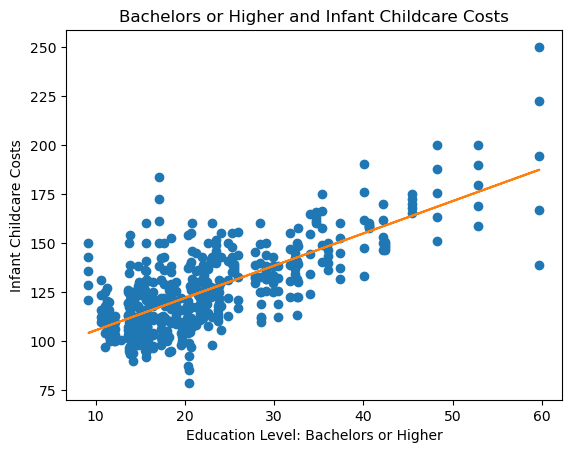

In [63]:
# Shaping data
cleaned = childcare_health.dropna(subset=['edu/bachelors+', 'mfcc_infant'])
cleaned = cleaned[cleaned['state']=='NC']
data = cleaned['edu/bachelors+'].values.reshape(-1, 1)
target = cleaned['mfcc_infant'].values

# Creating linear regression
regression = LinearRegression()
regression.fit(data, target)

# Coefficients and R-squared
print("Coefficients: ", regression.coef_)

# Plotting
x = cleaned['edu/bachelors+'].values
y = cleaned['mfcc_infant'].values

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel('Education Level: Bachelors or Higher')
plt.ylabel('Infant Childcare Costs')
plt.title('Bachelors or Higher and Infant Childcare Costs')

Coefficients:  [-1.09520206]


Text(0.5, 1.0, 'Some College and Infant Childcare Costs')

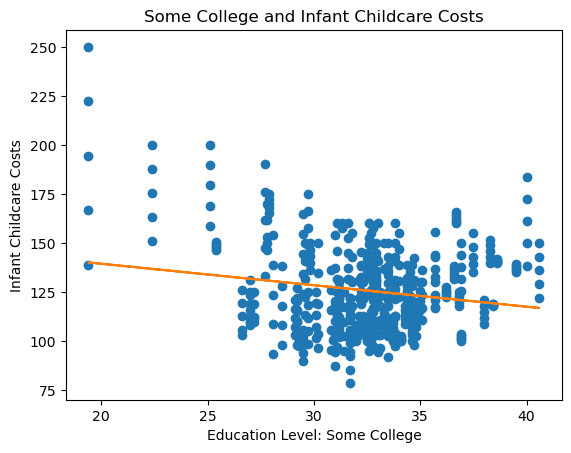

In [64]:
# Shaping data
cleaned = childcare_health.dropna(subset=['edu/some-college', 'mfcc_infant'])
cleaned = cleaned[cleaned['state']=='NC']
data = cleaned['edu/some-college'].values.reshape(-1, 1)
target = cleaned['mfcc_infant'].values

# Creating linear regression
regression = LinearRegression()
regression.fit(data, target)

# Coefficients and R-squared
print("Coefficients: ", regression.coef_)

# Plotting
x = cleaned['edu/some-college'].values
y = cleaned['mfcc_infant'].values

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel('Education Level: Some College')
plt.ylabel('Infant Childcare Costs')
plt.title('Some College and Infant Childcare Costs')